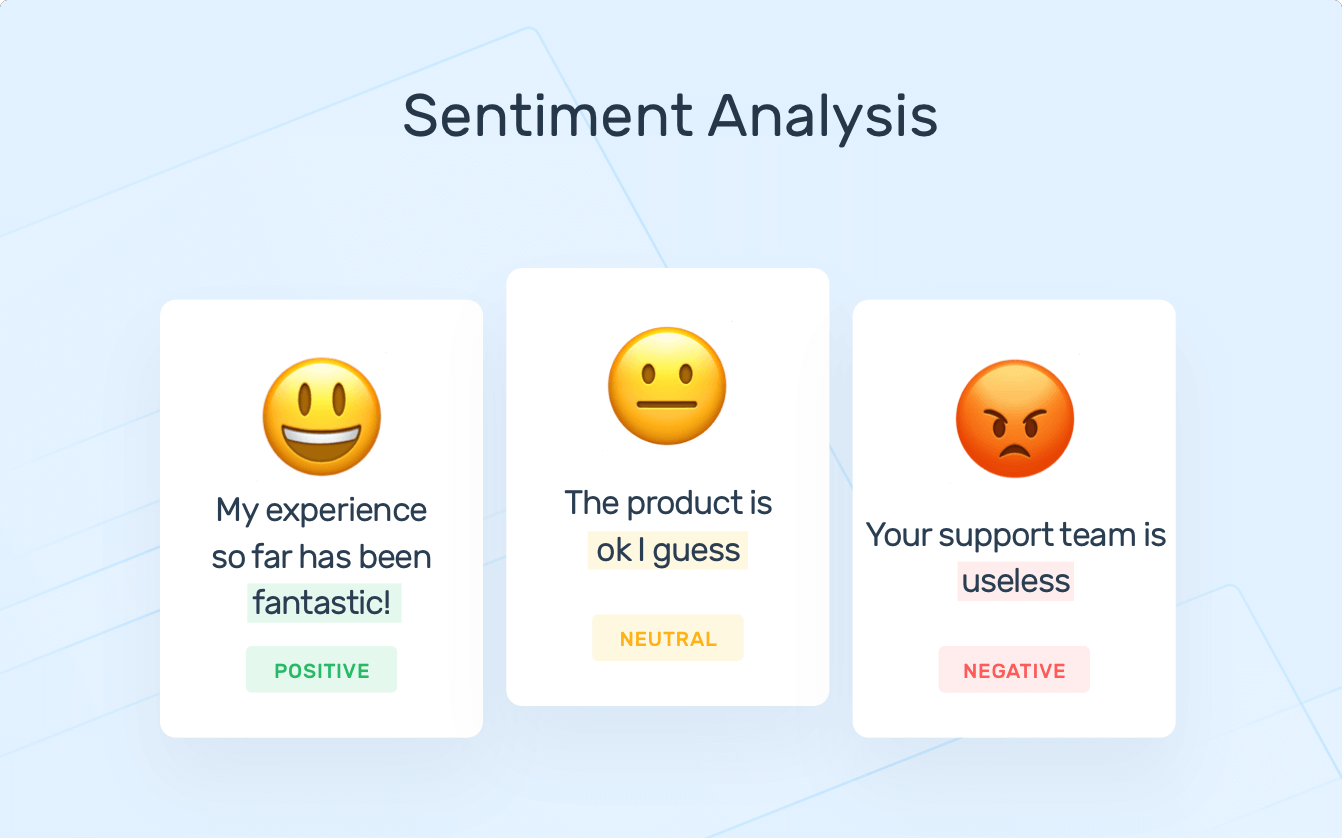

# Project Introduction:
- Sentiment analysis, a fundamental natural language processing (NLP) task, plays a crucial role in deciphering the emotions and opinions expressed in text data. In today's data-driven world, the ability to gauge public sentiment is invaluable across various industries. Our project focuses on sentiment analysis using a deep learning LSTM model, aiming to provide a robust solution for classifying text-based data into three sentiment categories: Positive, Negative, and Neutral.

# Importance of Sentiment Analysis in the Industry:
- Sentiment analysis is a powerful tool with far-reaching implications across industries. It enables businesses to understand customer feedback, gauge public perception, and make data-driven decisions. In marketing, sentiment analysis helps companies assess the impact of their campaigns. In finance, it aids in predicting market trends and investor sentiment. In customer service, it streamlines issue resolution by prioritizing customer feedback. In politics and social media, sentiment analysis is essential for monitoring public opinion. Hence, it's an invaluable asset for decision-making in today's data-driven world.

# Project Tasks:

### Data Preprocessing:

- My project starts with data preprocessing. We have collected a dataset containing tweets and their corresponding sentiment categories. Data preprocessing is essential to ensure the quality and consistency of the dataset.

### Data Analysis:

- Before diving into model building, I analyze the target variable to understand the distribution of sentiment classes. This step provides insights into the balance of the dataset and helps us assess the potential bias in the model.

### Word Clouds:

- To gain a visual understanding of the most common words associated with each sentiment class, we create word clouds. Word clouds provide an intuitive representation of the most frequently occurring words within each category.

### Text Cleaning:

- For text data to be suitable for machine learning models, we perform text cleaning. This includes removing symbols (except alphanumeric characters), transforming all words to lowercase, and eliminating punctuation and stopwords. Clean data ensures the model's effectiveness in capturing sentiment.

### NLP Techniques:
- Leveraging natural language processing (NLP) techniques, we tokenize and vectorize the text data. Tokenization breaks down text into individual words or tokens, and vectorization converts these tokens into numerical values, allowing the model to process the data effectively.

### Model Building:

- I experimented with various deep learning model architectures, particularly Long Short-Term Memory (LSTM) models, to build our sentiment analysis model. LSTM models are ideal for sequence data, making them well-suited for text classification tasks.

### Hyperparameter Tuning:

- To optimize model performance, we perform hyperparameter tuning, searching for the best configuration that maximizes predictive accuracy.

### Model Comparison:

- Finaaly,we compare the performance of different model variants to select the best-performing one. Model selection is a critical step in building a reliable sentiment analysis system.

### Predictive Analysis:

- The final model, trained on historical data, is ready to make predictions on new and upcoming data. It can automatically classify incoming text into one of the three sentiment categories: Positive, Negative, or Neutral.



In [2]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences
!pip install keras-tuner
import keras_tuner as kt
from tensorflow.keras.models import load_model
from wordcloud import WordCloud

nltk.download('stopwords')
import warnings
warnings.filterwarnings("ignore")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# loading the data
df = pd.read_csv("/kaggle/input/mydata/Twitter_Data.csv")

In [4]:
# checking the data
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [5]:
# checkig the shape of data
df.shape

(162980, 2)

In [6]:
# getting info about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


# Data Preprocessing, Data Analysis & Visualization

- In this crucial phase, we embark on data preprocessing while simultaneously delving into data analysis and visualization. The nature of text data necessitates a multi-faceted approach to ensure both cleanliness and interpretability. Let's explore these steps in detail:

### Data Preprocessing

- **Text Cleaning:** Our first endeavor is to prepare the text data for analysis and modeling. This entails a series of cleansing steps to enhance the quality of the dataset.

- **Removing Symbols:** We eliminate any extraneous symbols while preserving alphanumeric characters. This step streamlines the text data and removes any non-essential characters that may hinder analysis.

- **Text Lowercasing:** To maintain uniformity, we convert all words to lowercase. This ensures that the model treats words regardless of their capitalization, eliminating potential inconsistencies.

- **Punctuation and Stopword Removal:** Punctuation marks, while linguistically relevant, are removed to simplify the data. Additionally, we eliminate stopwords, which are common words such as 'the' and 'and' that do not carry significant meaning in isolation.

- **Zero Padding:** To facilitate deep learning model training, we standardize the length of each tweet by zero padding. This ensures that every input data point is of uniform size, an essential prerequisite for model training.

### Data Analysis & Visualization

- While preparing the text data for analysis, we concurrently explore its distribution and visualize the most frequent terms associated with each sentiment class. This provides us with valuable insights into the nature of the dataset.

- **Target Variable Distribution:** We begin by examining the distribution of the target variable, which represents sentiment categories. This step allows us to gauge the balance of sentiment classes in the dataset. A well-balanced dataset is essential for robust model performance.

- **Word Clouds for Sentiment Classes:** To gain an intuitive understanding of the most common words in each sentiment class, we create word clouds. These visual representations highlight words that frequently appear in Positive, Negative, and Neutral tweets. Word clouds offer a quick and informative overview of the dataset's content.

- This combined data preprocessing and analysis phase sets the stage for our subsequent tasks, including text vectorization, model building, and fine-tuning. It ensures that our text data is not only cleansed but also insightful, making it ready for advanced natural language processing and deep learning techniques.


In [7]:
# changing the category column to categorical
mapping = {1:"Positive",-1:"Negative",0:"Neutral"}

# replacing the 1,-1 and 0 in category column to Positive, Negative and Neutral
df["category"] = df["category"].map(mapping)

In [8]:
# counting each catrgory in target variable
category_count = df["category"].value_counts()

In [9]:
# creating a dataframe of the sentiment counts
category_count_df = pd.DataFrame({"Sentiment":category_count.index,"Counts":category_count.values})

In [10]:
# checking for missing values
df.isna().sum()

clean_text    4
category      7
dtype: int64

- Null values are spotted in the data, the number of null values found collectively are very small, so I will simply drop the null values.

In [11]:
# dropping null values
df.dropna(inplace=True)

In [12]:
# checking for duplicate values
df[df.duplicated()]

,clean_text,category


- No duplicated value found in the data.

In [13]:
# creating a copy of data
df2 = df.copy()

In [14]:
# making a function to clean data
def clean_text(df, column_name):
    """
    Cleans and preprocesses text data in a DataFrame column.

    Parameters:
        df (pd.DataFrame): The DataFrame containing text data.
        column_name (str): The name of the column to clean.

    Returns:
        pd.DataFrame: The DataFrame with cleaned text in the specified column.

    This function performs the following cleaning steps:
    1. Removes symbols and keeps alphanumeric characters.
    2. Converts text to lowercase.
    3. Removes punctuation.
    4. Removes common English stopwords.

    Example:
    df = clean_text(df, "text_column")
    """
    def text_cleaning(text):
        # Removing symbols and keeping alphanumeric characters
        text = re.sub(r'[^a-zA-Z0-9]', ' ', text)
        
        # Converting text to lowercase
        text = text.lower()
        return text

    # Applying text cleaning to the specified column
    df[column_name] = df[column_name].apply(text_cleaning)

    # Removing punctuation
    df[column_name] = df[column_name].str.replace('[^\w\s]', ' ')

    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    df[column_name] = df[column_name].apply(lambda text: ' '.join([word for word in text.split() if word not in stop_words]))

    # Returning the dataframe
    return df



In [15]:
# cleaning the data
df2 = clean_text(df2, 'clean_text')

In [16]:
# Visualizing the distribution of target variable
px.bar(category_count_df,y="Sentiment",x="Counts",color="Sentiment",title="Distribution of Target Variable")


# Target Variable Distribution

The bar graph above provides an insightful perspective on the distribution of classes within our target variable, which categorizes the sentiment expressed in tweets. This analysis is fundamental to understanding the overall sentiment composition of the dataset.

### **Class Distribution Overview:**
- Positive Sentiment: The most prevalent sentiment class in our dataset is 'Positive.' A significant portion of the tweets, approximately 72.25 thousand, convey positive sentiments. This suggests a prevalent trend of optimism and positivity within the text data, reflecting the upbeat nature of a substantial share of the tweets.

- Neutral Sentiment: Following closely is the 'Neutral' sentiment class, representing approximately 55.2 thousand tweets. The considerable presence of neutral sentiment suggests that a significant portion of the tweets conveys information or statements without a strong positive or negative emotional tone.

- Negative Sentiment: The 'Negative' sentiment class ranks third in frequency, with around 35.5 thousand tweets. This category signifies the presence of negative emotions and opinions expressed within the text data. While less frequent than the other two categories, the negative sentiment class remains substantial.




In [17]:
# Creating a separate DataFrames for each category
positive_df = df[df['category'] == 'Positive']
negative_df = df[df['category'] == 'Negative']
neutral_df = df[df['category'] == 'Neutral']

In [18]:
def generate_wordcloud(text, title):
    """
    Generates and displays a word cloud from the given text.

    Parameters:
        text (str): The input text used to generate the word cloud.
        title (str): The title to display above the word cloud.

    This function creates a word cloud from the input text and displays it as a plot.
    The word cloud visualizes the frequency of words in the text, with the specified title.
    """
    # Generating the word cloud from the input text
    wordcloud = WordCloud(width=400, height=300, background_color='white').generate(text)

    # Creating a plot for displaying the word cloud
    plt.figure(figsize=(6, 4))

    # Displaying the word cloud image with bilinear interpolation
    plt.imshow(wordcloud, interpolation='bilinear')

    # Setting the title for the plot
    plt.title(title)

    # Turning off the axis to remove unnecessary labels
    plt.axis('off')

    # Showing the plot with the word cloud
    plt.show()


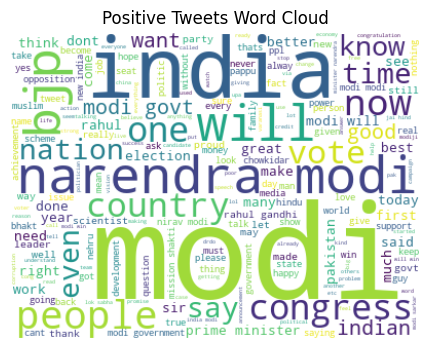

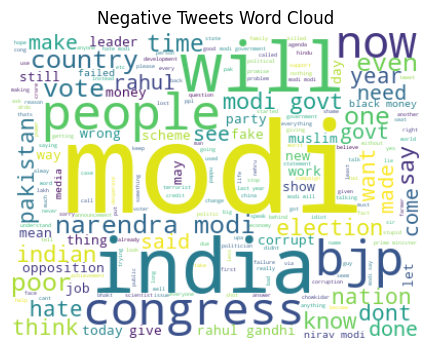

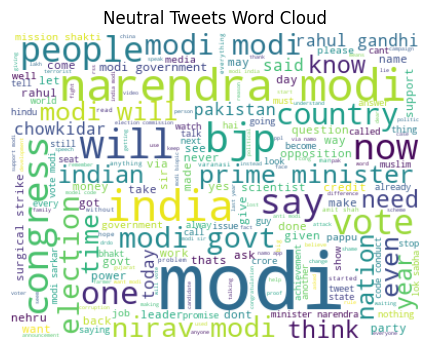

In [19]:
# Generating and displaying word clouds for each category
generate_wordcloud(' '.join(positive_df['clean_text']), 'Positive Tweets Word Cloud')
generate_wordcloud(' '.join(negative_df['clean_text']), 'Negative Tweets Word Cloud')
generate_wordcloud(' '.join(neutral_df['clean_text']), 'Neutral Tweets Word Cloud')

In [20]:
# printing the first tweet in our data
print("First Tweet in our data without cleaning\n")
df.iloc[0,0]

First Tweet in our data without cleaning



'when modi promised “minimum government maximum governance” expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit psus and temples'

In [21]:
# prinitng the first tweet after cleaning
print("First Tweet in our data after cleaning\n")
df2.iloc[0,0]

First Tweet in our data after cleaning



'modi promised minimum government maximum governance expected begin difficult job reforming state take years get justice state business exit psus temples'

In [22]:
# making a new column that contains tweet length after cleaning
df2["tweet_length"] = df2["clean_text"].apply(lambda x: len(x))

In [23]:
# checking data with new column
df2.head()

,clean_text,category,tweet_length
0,modi promised minimum government maximum gover...,Negative,152
1,talk nonsense continue drama vote modi,Neutral,38
2,say vote modi welcome bjp told rahul main camp...,Positive,74
3,asking supporters prefix chowkidar names modi ...,Positive,142
4,answer among powerful world leader today trump...,Positive,61


In [24]:
# separating clean text for tokenization
text = df2["clean_text"]

In [25]:
# initializing the tokenizer
tokenizer = Tokenizer()

In [26]:
# fitting on cleaned text
tokenizer.fit_on_texts(text)

In [27]:
# counting words
len(tokenizer.word_index)

106403

In [28]:
# tokenizing the text
tokenized_text = tokenizer.texts_to_sequences(text)

In [29]:
# checking the first tweet after tokenization
tokenized_text[0]

[1,
 225,
 636,
 23,
 1589,
 714,
 1022,
 2268,
 1111,
 131,
 16900,
 135,
 48,
 15,
 25,
 968,
 135,
 461,
 4034,
 5337,
 2689]

In [30]:
# checking the maximum length tweet
max_len = max([len(x) for x in tokenized_text])
print("Maximum Length of a tweet in our data {}".format(max_len))

Maximum Length of a tweet in our data 43


In [31]:
# adding zero padding to make all tweets of same size, each tweet length will be equal to the biggest tweet length
padded_text =  pad_sequences(tokenized_text, maxlen = max_len, padding='pre')


In [32]:
print("First Tweet before padding {}".format(len(tokenized_text[0])))
print("First Tweet after padding {}".format(len(padded_text[0])))

First Tweet before padding 21
First Tweet after padding 43


In [33]:
print("First tweet after padding {}".format(len(padded_text[0])))
print("Fifth tweet after padding {}".format(len(padded_text[4])))

First tweet after padding 43
Fifth tweet after padding 43


# Deep Learning 

- In this pivotal phase of our project, we will use LSTM of deep learning for sentiment analysis. This section encompasses several essential tasks, each contributing to the development of a robust sentiment classification model.

### One-Hot Encoding of Target Variable

- **One-Hot Encoding:** Our journey begins with the transformation of the target variable. Sentiment categories, including Positive, Neutral, and Negative, are encoded into a numerical format using one-hot encoding. This process converts categorical data into a binary representation, making it suitable for deep learning model training.

## Data Splitting: Training and Test Sets

- **Data Split:** To assess the model's performance, we partition the dataset into training and test sets. This division is vital for evaluating the model's generalization capabilities, ensuring that it can make accurate predictions on unseen data. A well-balanced split is maintained to provide representative samples for training and evaluation.

## Model Experimentation

- **Model Architectures:** This section is marked by extensive experimentation with diverse deep learning model architectures. A range of Long Short-Term Memory (LSTM) networks, are explored to determine their suitability for sentiment analysis. These architectures are chosen for their proficiency in processing sequence data, which is inherent in text classification. I have evaluated my models on the basis of accuracy score, classification report and confusion matrix. During model training I have used call backs function to save the model which is giving best accuracy on the validation data. Then, I load the saved model and used it for predicting the testing data.

## Hyperparameter Tuning

- **Hyperparameter Optimization:** The quest for model optimization leads to the critical phase of hyperparameter tuning. In this endeavor, we fine-tune the model's hyperparameters to achieve the best possible performance. Notably, this process is conducted initially using a 10% subset of the data for expediency, providing quicker results while maintaining the integrity of the tuning process.

## Model Comparison

- **Model Evaluation:** A rigorous comparison of the fine-tuned models is performed. This selection is informed by the model's ability to accurately classify sentiment within the text data. The model is chosed on the basis of accuracy score. The best model is the one displaying the maximum accuracy on testing data.

## Training on Full Data

- **Final Model Training:** Upon the identification of the optimal model, it is trained on the complete dataset. This ensures that the model leverages the full spectrum of available data to further enhance its predictive capabilities.

## Predictive Analysis

- **New Data Predictions:** The culminating step in the deep learning section involves leveraging the trained model to make predictions on new, incoming data. This process exemplifies the practical utility of the sentiment analysis model, allowing it to automatically categorize incoming text into the predefined sentiment classes: Positive, Neutral, or Negative.

.


In [34]:
# defining target variable
y = df2[["category"]]


In [35]:
mapping_target = {"Negative":0,"Neutral":1,"Positive":2}
y["category"] = y["category"].map(mapping_target)

In [36]:
# splitting data into training and test set
X_train,X_test,y_train,y_test = train_test_split(padded_text,y,test_size=0.2,random_state=21)

In [37]:
# converting the target numerical representation into vectors
y_train = to_categorical(y_train,num_classes=3)

In [38]:
print("Number of unique words in our data {}".format(len(tokenizer.word_index)))

Number of unique words in our data 106403


In [39]:
# initializing the model
model = Sequential()

# adding an embedding layer, using all words in the data for word vocabulary, each word will be represented by a 10 dimentional vector, input length of tweets are 43
model.add(Embedding(106404, 10, input_length=43))

# adding first LSTM hidden layer of 150 neurons
model.add(LSTM(150))

# adding output layer with 3 neurons as we have 3 classes in our target variable
model.add(Dense(3, activation='softmax'))

In [40]:
# compiling the model
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [41]:
# displaying summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 43, 10)            1064040   
                                                                 
 lstm (LSTM)                 (None, 150)               96600     
                                                                 
 dense (Dense)               (None, 3)                 453       
                                                                 
Total params: 1,161,093
Trainable params: 1,161,093
Non-trainable params: 0
_________________________________________________________________


In [42]:
# Defining the ModelCheckpoint callback to save the best model based on validation accuracy
checkpoint_first = ModelCheckpoint("first_model.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max', save_weights_only=False)


In [43]:
# saving the model and applying call back
first_model = model.fit(X_train,y_train,epochs=5,validation_split=0.2,callbacks=[checkpoint_first])

Epoch 1/5
3260/3260 [==============================] - ETA: 0s - loss: 0.4942 - accuracy: 0.8142
Epoch 1: val_accuracy improved from -inf to 0.89883, saving model to first_model.h5
3260/3260 [==============================] - 70s 20ms/step - loss: 0.4942 - accuracy: 0.8142 - val_loss: 0.3247 - val_accuracy: 0.8988
Epoch 2/5
3260/3260 [==============================] - ETA: 0s - loss: 0.2560 - accuracy: 0.9195
Epoch 2: val_accuracy improved from 0.89883 to 0.90857, saving model to first_model.h5
3260/3260 [==============================] - 23s 7ms/step - loss: 0.2560 - accuracy: 0.9195 - val_loss: 0.2884 - val_accuracy: 0.9086
Epoch 3/5
3260/3260 [==============================] - ETA: 0s - loss: 0.1921 - accuracy: 0.9410
Epoch 3: val_accuracy did not improve from 0.90857
3260/3260 [==============================] - 21s 7ms/step - loss: 0.1921 - accuracy: 0.9410 - val_loss: 0.3128 - val_accuracy: 0.9062
Epoch 4/5
3260/3260 [==============================] - ETA: 0s - loss: 0.1533 - accu

- we can see that after third epoch the model accuracy reduced and it started overfitting.

In [44]:
# Loading the saved model
first_loaded_model = load_model("first_model.h5")

In [45]:
# getting prediction on testing data
y_pred_prob_first = first_loaded_model.predict(X_test)

1019/1019 [==============================] - 3s 2ms/step


In [46]:
# as softmax outputs probability of a data point for each class, so chosing the index with maximum probability
y_pred_first = np.argmax(y_pred_prob_first,axis=1)


In [47]:
# computing accuracy of model
accuracy_first_model = accuracy_score(y_test,y_pred_first)
print("Accuracy Score on Testing Set of First Model is {}".format(accuracy_first_model))

Accuracy Score on Testing Set of First Model is 0.9076517150395779


- We can see that the the model is also performing good on the testing data.

In [48]:
# classification report of first model
class_report_first = classification_report(y_test,y_pred_first)

print(class_report_first)

              precision    recall  f1-score   support

           0       0.88      0.82      0.85      7162
           1       0.92      0.94      0.93     10933
           2       0.91      0.92      0.92     14499

    accuracy                           0.91     32594
   macro avg       0.90      0.90      0.90     32594
weighted avg       0.91      0.91      0.91     32594



- Precision means when our model says that a data point belong to a particular class say 0 (Negative), how much it is sure, in above model the model is 88% sure when it predicts a zero label for a data point.
- Recall means when our model gives 0.85 recall for 0 class (negative) it means that out of 100 negative points it classified 85 of them correctly.

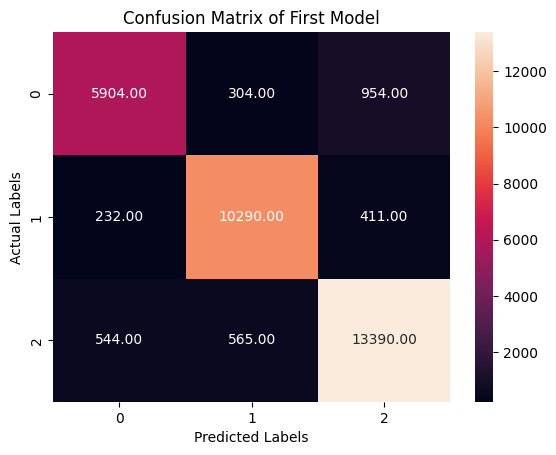

In [49]:
# confusion matrix of first model
conf_matrix_first = confusion_matrix(y_test,y_pred_first)

# making a heatmap
sns.heatmap(conf_matrix_first,annot=True,fmt=".2f")
plt.title("Confusion Matrix of First Model")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()


- After Evaluating the confusion matrix, i can conclude that the overall performance of the first model is good.

# First Model with Dropout layer
- Now, I will add a dropout layer in my previous model and train it for a greater number of epochs as compared to previous number of epochs and see if we get better results or not.

In [50]:
# initializing the model
model = Sequential()

# adding an embedding layer, using all words in the data for word vocabulary, each word will be represented by a 10 dimentional vector, input length of tweets are 43
model.add(Embedding(106404, 10, input_length=43))

# adding first LSTM hidden layer of 150 neurons
model.add(LSTM(150))

# adding a dropout layer 
model.add(Dropout(0.5))


# adding output layer with 3 neurons as we have 3 classes in our target variable
model.add(Dense(3, activation='softmax'))

In [51]:
# compiling the model
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [52]:
# Defining the ModelCheckpoint callback to save the best model based on validation accuracy
checkpoint_first_dropout = ModelCheckpoint("first_model_dropout.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max', save_weights_only=False)


In [53]:
# saving the model and applying call back
first_model_dropout = model.fit(X_train,y_train,epochs=10,validation_split=0.2,callbacks=[checkpoint_first_dropout])

Epoch 1/10
3260/3260 [==============================] - ETA: 0s - loss: 0.4740 - accuracy: 0.8248
Epoch 1: val_accuracy improved from -inf to 0.90880, saving model to first_model_dropout.h5
3260/3260 [==============================] - 52s 15ms/step - loss: 0.4740 - accuracy: 0.8248 - val_loss: 0.2990 - val_accuracy: 0.9088
Epoch 2/10
3260/3260 [==============================] - ETA: 0s - loss: 0.2488 - accuracy: 0.9251
Epoch 2: val_accuracy improved from 0.90880 to 0.91532, saving model to first_model_dropout.h5
3260/3260 [==============================] - 23s 7ms/step - loss: 0.2488 - accuracy: 0.9251 - val_loss: 0.2778 - val_accuracy: 0.9153
Epoch 3/10
3260/3260 [==============================] - ETA: 0s - loss: 0.1927 - accuracy: 0.9416
Epoch 3: val_accuracy did not improve from 0.91532
3260/3260 [==============================] - 21s 6ms/step - loss: 0.1927 - accuracy: 0.9416 - val_loss: 0.3045 - val_accuracy: 0.9080
Epoch 4/10
3260/3260 [==============================] - ETA: 0s -

- After adding the dropout layer the overfitting didn't reduce much in later epochs and nor does the accuracy improved than the previous model.

In [54]:
# Loading the saved model
firstdropout_loaded_model = load_model("first_model_dropout.h5")

In [55]:
# getting prediction on testing data
y_pred_prob_firstdropout = firstdropout_loaded_model.predict(X_test)

1019/1019 [==============================] - 3s 2ms/step


In [56]:
# as softmax outputs probability of a data point for each class, so chosing the index with maximum probability
y_pred_firstdropout = np.argmax(y_pred_prob_firstdropout,axis=1)

In [57]:
# computing accuracy of model
accuracy_firstdropout_model = accuracy_score(y_test,y_pred_firstdropout)
print("Accuracy Score on Testing Set of First Model with dropout layer is {}".format(accuracy_firstdropout_model))

Accuracy Score on Testing Set of First Model with dropout layer is 0.9131742038411977


In [58]:
# classification report of first model with dropout model
class_report_firstdropout = classification_report(y_test,y_pred_firstdropout)

print(class_report_firstdropout)

              precision    recall  f1-score   support

           0       0.89      0.82      0.86      7162
           1       0.92      0.96      0.94     10933
           2       0.92      0.92      0.92     14499

    accuracy                           0.91     32594
   macro avg       0.91      0.90      0.91     32594
weighted avg       0.91      0.91      0.91     32594



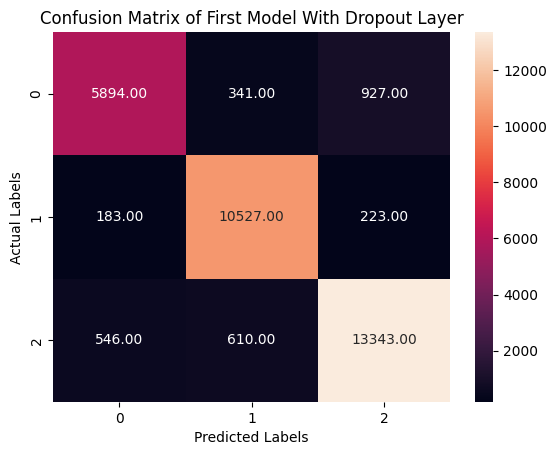

In [59]:
# confusion matrix of first model
conf_matrix_firstdropout = confusion_matrix(y_test,y_pred_firstdropout)

# making a heatmap
sns.heatmap(conf_matrix_firstdropout,annot=True,fmt=".2f")
plt.title("Confusion Matrix of First Model With Dropout Layer")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()


- The accuracy, classification report and confusion matrix of model with dropout layer are similar to the first model without dropout layer in performance.

# Model 2
- Now, I will experiment with a model which will have reduced vocabulary and a different architecture containing multiple hidden layers and dropout layer as well.

In [60]:
# initializing the second model
model = Sequential()

# adding an Embedding layer, word vocabulary is of 53000 words, each word will be represented by a 10 dimentional vector
model.add(Embedding(53000, 10, input_length=43))

# first layer
model.add(LSTM(75,activation="relu",return_sequences=True))

# dropout layer
model.add(Dropout(0.4))

# second layer
model.add(LSTM(25,activation="relu"))

# adding output layer with 3 neurons as we have 3 classes in our data
model.add(Dense(3, activation='softmax'))

In [61]:
# compiling the model
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [62]:
# displaying the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 43, 10)            530000    
                                                                 
 lstm_2 (LSTM)               (None, 43, 75)            25800     
                                                                 
 dropout_1 (Dropout)         (None, 43, 75)            0         
                                                                 
 lstm_3 (LSTM)               (None, 25)                10100     
                                                                 
 dense_2 (Dense)             (None, 3)                 78        
                                                                 
Total params: 565,978
Trainable params: 565,978
Non-trainable params: 0
_________________________________________________________________


In [63]:
# Defining the ModelCheckpoint callback to save the best model based on validation accuracy
checkpoint_second = ModelCheckpoint("second_model.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max', save_weights_only=False)


In [64]:
# fitting the second model
second_model = model.fit(X_train,y_train,epochs=5,validation_split=0.2,callbacks=[checkpoint_second])

Epoch 1/5
3260/3260 [==============================] - ETA: 0s - loss: 0.4577 - accuracy: 0.8315
Epoch 1: val_accuracy improved from -inf to 0.91060, saving model to second_model.h5
3260/3260 [==============================] - 492s 150ms/step - loss: 0.4577 - accuracy: 0.8315 - val_loss: 0.2940 - val_accuracy: 0.9106
Epoch 2/5
3260/3260 [==============================] - ETA: 0s - loss: 0.2646 - accuracy: 0.9188
Epoch 2: val_accuracy improved from 0.91060 to 0.91689, saving model to second_model.h5
3260/3260 [==============================] - 450s 138ms/step - loss: 0.2646 - accuracy: 0.9188 - val_loss: 0.2795 - val_accuracy: 0.9169
Epoch 3/5
3260/3260 [==============================] - ETA: 0s - loss: 0.2143 - accuracy: 0.9336
Epoch 3: val_accuracy did not improve from 0.91689
3260/3260 [==============================] - 448s 137ms/step - loss: 0.2143 - accuracy: 0.9336 - val_loss: 0.2945 - val_accuracy: 0.9133
Epoch 4/5
3260/3260 [==============================] - ETA: 0s - loss: 0.1

- The above model shows that  after using half of the vocabulary of words and multilayered structured, we are getting similar results.
- After third epoch the model started to overfitting and the accuracy on the validation split is reducing in the later epochs

In [65]:
# Loading the saved model
second_loaded_model = load_model("second_model.h5")

In [66]:
# getting prediction on testing data
y_pred_prob_second = second_loaded_model.predict(X_test)

1019/1019 [==============================] - 12s 11ms/step


In [67]:
# getting the label for predicted probabilites
y_pred_second = np.argmax(y_pred_prob_second,axis=1)

In [68]:
accuracy_second_model = accuracy_score(y_test,y_pred_second)
print("Accuracy Score on Testing Set of second Model is {}".format(accuracy_second_model))

Accuracy Score on Testing Set of second Model is 0.9146161870282874


- The accuracy of the second model is less as compared to the first model.

In [69]:
# classification report of second model
class_report_second = classification_report(y_test,y_pred_second)

print(class_report_second)

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      7162
           1       0.91      0.97      0.94     10933
           2       0.95      0.89      0.92     14499

    accuracy                           0.91     32594
   macro avg       0.90      0.91      0.91     32594
weighted avg       0.92      0.91      0.91     32594



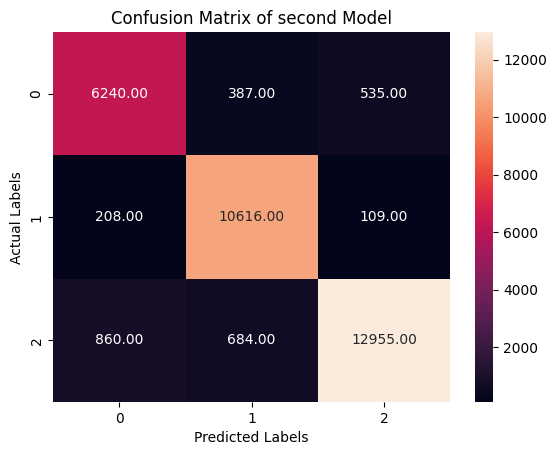

In [70]:
# confusion matrix of second model
conf_matrix_second = confusion_matrix(y_test,y_pred_second)

# making a heatmap
sns.heatmap(conf_matrix_second,annot=True,fmt=".2f")
plt.title("Confusion Matrix of second Model")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()


- The second model confusion matrix is also showing good results but it didn't outperform the first model without dropout layer.

# Hyperparameter Tuning
- As we have experimented with two models and both models had different architecturs. It is quite hectic to find the right number of layers, number of neurons and dropout layer value. So, instead of individually experimenting with models, we can do hyperparameter tuning and see if we get better results as compare to previous models. I will use keras tuner and Random Search for hyperparameter tuning. In tuning, our objective will be to increase the validation accuracy.
- Now, we will do hyperparameter tuning and we will tune following things:
- Number of layers.
- Number of neurons in each layer.
- Activation function of each layer.
- Droput layer value.


### Note
- I will take only 10% of the total data for hyperparameter tuning to reduce the training time.

In [71]:
# Determining the number of samples to select (10% of the data)
sample_size = int(0.10 * len(y_train))

# Randomly sampling 10% of the data
indices = np.random.choice(len(y_train), sample_size, replace=False)

# Selecting the sampled data
sampled_y_train = y_train[indices]
sampled_X_train = X_train[indices]

# Checking the shapes of the sampled data
print("Sampled target variable shape:", sampled_y_train.shape)
print("Sampled feature array shape:", sampled_X_train.shape)


Sampled target variable shape: (13037, 3)
Sampled feature array shape: (13037, 43)


In [72]:
def build_model2(hp):
    """
    Build a deep learning model with hyperparameter tuning.

    This function constructs a deep learning model with tunable hyperparameters using the Keras Tuner.
    The model architecture includes Embedding layers, multiple LSTM layers with varying neurons and activations,
    and Dropout layers. The model is compiled with different optimizer choices.

    Args:
        hp (keras_tuner.HyperParameters): The hyperparameters to be tuned.

    Returns:
        keras.models.Sequential: The constructed deep learning model.

    """
    # initializing the model    
    model = Sequential()
    

    # Embedding layer with specified parameters
    model.add(Embedding(106404, 10, input_length=43))
    
    # Number of LSTM layers based on hyperparameter tuning
    num_layers = hp.Int("Layers", min_value=1, max_value=7)
    
    for i in range(num_layers):
        if i == num_layers - 1:
            # Last LSTM layer should not return sequences
            model.add(LSTM(hp.Int("neuron" + str(i), min_value=75, max_value=250, step=15),
                           activation=hp.Choice("activation" + str(i), values=["relu", "tanh"]),
                           return_sequences=False))
            # dropout layer with different values
            model.add(Dropout(hp.Choice("dropout" + str(i), values=[0.1, 0.2, 0.3, 0.4, 0.5])))
        else:
            model.add(LSTM(hp.Int("neuron" + str(i), min_value=75, max_value=250, step=15),
                           activation=hp.Choice("activation" + str(i), values=["relu", "tanh"]),
                           return_sequences=True))
            model.add(Dropout(hp.Choice("dropout" + str(i), values=[0.1, 0.2, 0.3, 0.4, 0.5])))
    
    # Output layer with softmax activation
    model.add(Dense(3, activation="softmax"))
    
    # compiling the model
    model.compile(optimizer=hp.Choice("Optimizer", values=["adam"]),
                  loss="categorical_crossentropy",
                  metrics=["accuracy"])

    return model


In [73]:
# I will do tuning for 5 trials only
tuner = kt.RandomSearch(build_model2,objective="val_accuracy",max_trials=5,directory="mydir",project_name="hyperparameter tuning for final models")


In [74]:
# using the sampled data for tuning of models
tuner.search(sampled_X_train,sampled_y_train,epochs=5,validation_split=0.2)

Trial 5 Complete [00h 05m 28s]
val_accuracy: 0.7848926186561584

Best val_accuracy So Far: 0.8075153231620789
Total elapsed time: 00h 27m 02s


In [75]:
# displaying the best hyperparameters
tuner.get_best_hyperparameters()[0].values

{'Layers': 1,
 'neuron0': 225,
 'activation0': 'tanh',
 'dropout0': 0.4,
 'Optimizer': 'adam',
 'neuron1': 240,
 'activation1': 'tanh',
 'dropout1': 0.4,
 'neuron2': 180,
 'activation2': 'relu',
 'dropout2': 0.3,
 'neuron3': 210,
 'activation3': 'tanh',
 'dropout3': 0.4,
 'neuron4': 75,
 'activation4': 'relu',
 'dropout4': 0.2,
 'neuron5': 135,
 'activation5': 'relu',
 'dropout5': 0.3}

In [76]:
# saving the model given by hyperparameter tuning
best_model_tuning = tuner.get_best_models(num_models=1)[0]

In [77]:
# now training the best model given by hyperparameter tuning on full data
best_model_tuning.fit(X_train,y_train,epochs=5,validation_split=0.2)

Epoch 1/5
3260/3260 [==============================] - 53s 16ms/step - loss: 0.3332 - accuracy: 0.8961 - val_loss: 0.2894 - val_accuracy: 0.9109
Epoch 2/5
3260/3260 [==============================] - 23s 7ms/step - loss: 0.2271 - accuracy: 0.9305 - val_loss: 0.2786 - val_accuracy: 0.9152
Epoch 3/5
3260/3260 [==============================] - 23s 7ms/step - loss: 0.1750 - accuracy: 0.9470 - val_loss: 0.3153 - val_accuracy: 0.9019
Epoch 4/5
3260/3260 [==============================] - 22s 7ms/step - loss: 0.1372 - accuracy: 0.9581 - val_loss: 0.3569 - val_accuracy: 0.8981
Epoch 5/5
3260/3260 [==============================] - 22s 7ms/step - loss: 0.1097 - accuracy: 0.9670 - val_loss: 0.3730 - val_accuracy: 0.8953


In [78]:
# getting prediction on testing data
y_pred_prob_tuned = best_model_tuning.predict(X_test)

1019/1019 [==============================] - 3s 2ms/step


In [79]:
# getting the prediciton labels for predicted probabilities
y_pred_tuned = np.argmax(y_pred_prob_tuned,axis=1)

In [80]:
accuracy_tuned_model = accuracy_score(y_test,y_pred_tuned)
print("Accuracy Score on Testing Set of  Model given by hyperparameter tuning is {}".format(accuracy_tuned_model))

Accuracy Score on Testing Set of  Model given by hyperparameter tuning is 0.8894888629809168


In [81]:
# classification report of first model
class_report_tuned = classification_report(y_test,y_pred_tuned)

print(class_report_tuned)

              precision    recall  f1-score   support

           0       0.85      0.81      0.83      7162
           1       0.91      0.91      0.91     10933
           2       0.90      0.91      0.90     14499

    accuracy                           0.89     32594
   macro avg       0.88      0.88      0.88     32594
weighted avg       0.89      0.89      0.89     32594



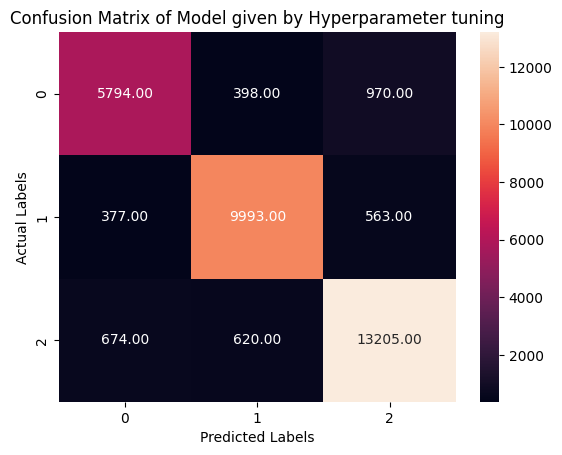

In [82]:
# confusion matrix of second model
conf_matrix_tuned = confusion_matrix(y_test,y_pred_tuned)

# making a heatmap
sns.heatmap(conf_matrix_tuned,annot=True,fmt=".2f")
plt.title("Confusion Matrix of Model given by Hyperparameter tuning")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()


# Model Comparison
- Now, we will compare all above models on the basis of accuracy score on testing set. I will chose the model that will have best accuracy on the testing set

In [83]:
# storing accuracy of models in a list
models_accuracy = [accuracy_first_model,accuracy_firstdropout_model,accuracy_second_model,accuracy_tuned_model]

# saving the model names in a list
model_names = ["First Model","First Model with Dropout","Second Model","Model from Hyperparameter Tuning"]

# making a dataframe of results
accuracy_df = pd.DataFrame({"model_names":model_names,"Accuracy":models_accuracy,})

In [84]:
# displaying the accuracy score data
accuracy_df

,model_names,Accuracy
0,First Model,0.907652
1,First Model with Dropout,0.913174
2,Second Model,0.914616
3,Model from Hyperparameter Tuning,0.889489


- The results show that our first model is performing the best, so I will take my first model as the best model.

# Training the model on full data
- Now, we will use the best model hyperparameters and train it on complete data we have.

In [85]:
# encoding the complete y having full data
y_final_encoded = to_categorical(y,num_classes=3)

In [86]:
# initializing the final model
final_model = Sequential()

# adding an embedding layer, using all words in the data for word vocabulary, each word will be represented by a 10 dimentional vector, input length of tweets are 43
final_model.add(Embedding(106404, 10, input_length=43))

# adding first LSTM hidden layer of 150 neurons
final_model.add(LSTM(150))

# adding output layer with 3 neurons as we have 3 classes in our target variable
final_model.add(Dense(3, activation='softmax'))

In [87]:
# compiling the model
final_model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [88]:
# displaying summary of the model
final_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 43, 10)            1064040   
                                                                 
 lstm_1 (LSTM)               (None, 150)               96600     
                                                                 
 dense_1 (Dense)             (None, 3)                 453       
                                                                 
Total params: 1,161,093
Trainable params: 1,161,093
Non-trainable params: 0
_________________________________________________________________


In [89]:
# Defining the ModelCheckpoint callback to save the best model based on validation accuracy
checkpoint_final = ModelCheckpoint("final_model.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max', save_weights_only=False)


In [90]:
# saving the model and applying call back
final_model = final_model.fit(padded_text,y_final_encoded,epochs=5,validation_split=0.2,callbacks=[checkpoint_final])

Epoch 1/5
4075/4075 [==============================] - ETA: 0s - loss: 0.4031 - accuracy: 0.8559
Epoch 1: val_accuracy improved from -inf to 0.91026, saving model to final_model.h5
4075/4075 [==============================] - 58s 14ms/step - loss: 0.4031 - accuracy: 0.8559 - val_loss: 0.3038 - val_accuracy: 0.9103
Epoch 2/5
4075/4075 [==============================] - ETA: 0s - loss: 0.2273 - accuracy: 0.9313
Epoch 2: val_accuracy improved from 0.91026 to 0.91207, saving model to final_model.h5
4075/4075 [==============================] - 28s 7ms/step - loss: 0.2273 - accuracy: 0.9313 - val_loss: 0.2972 - val_accuracy: 0.9121
Epoch 3/5
4075/4075 [==============================] - ETA: 0s - loss: 0.1797 - accuracy: 0.9454
Epoch 3: val_accuracy did not improve from 0.91207
4075/4075 [==============================] - 26s 6ms/step - loss: 0.1797 - accuracy: 0.9454 - val_loss: 0.3278 - val_accuracy: 0.9003
Epoch 4/5
4075/4075 [==============================] - ETA: 0s - loss: 0.1435 - accu

# Prediction on New Data
- Now, we will use the best model and we will make prediciton on new data. I will apply all the techniques of data preprocessing on the new data.

In [91]:
def prediction():
    """
    Predicts the sentiment of a text input using a pre-trained model.

    This function takes user input, pre-processes the text, tokenizes and pads it, loads a pre-trained model,
    and predicts the sentiment of the text as either negative, neutral, or positive.

    Example:
    To use this function, simply call it and provide input when prompted.
    """
    # Input new data
    new_data = input()
    
    # Creating a DataFrame with the new data
    new_df = pd.DataFrame({"New Data": [new_data]})
    
    # Cleaning the text
    new_df = clean_text(new_df, "New Data")  # Assuming you have a function clean_text
    
    # Tokenizing and padding the text
    new_tokenized_text = tokenizer.texts_to_sequences(new_df["New Data"])
    new_padded_text = pad_sequences(new_tokenized_text, maxlen=max_len, padding='pre')
    
    # Loading the pre-trained best  model
    best_model = load_model("/kaggle/working/final_model.h5")
    
    # Making predictions
    y_pred_prob_new = best_model.predict(new_padded_text)
    label = np.argmax(y_pred_prob_new)
    
    
    # applying if-else condition 
    if label == 0:
        print("Sentiment of the tweet is negative.")
    elif label == 1:
        print("Sentiment of the tweet is neutral.")
    else:
        print("Sentiment of the tweet is positive.")

In [92]:
# experiment 1
prediction()

 Had a frustrating day at work, dealing with deadlines and demanding clients. The traffic on the way home was unbearable, and it's been a tough evening


1/1 [==============================] - 0s 354ms/step
Sentiment of the tweet is negative.


In [93]:
# experiment 2
prediction()


  Ahsan here, working on a sentiment analysis project. Sitting in a coffee shop


1/1 [==============================] - 0s 340ms/step
Sentiment of the tweet is neutral.


In [94]:
# experiment 3
prediction()

 Beautiful day outside! Spent it with loved ones, enjoying nature, and feeling grateful for the little joys in life


1/1 [==============================] - 0s 339ms/step
Sentiment of the tweet is positive.


In [95]:
# experiment 4
prediction()

 My experience so far has been fantastic!


1/1 [==============================] - 0s 343ms/step
Sentiment of the tweet is positive.


In [96]:
# experiment 5
prediction()

 The product is ok I guess


1/1 [==============================] - 0s 337ms/step
Sentiment of the tweet is neutral.


In [97]:
# experiment 6
prediction()

 Your support team is useless!


1/1 [==============================] - 0s 340ms/step
Sentiment of the tweet is negative.


# Conclusion
- Above models are solely results of vast experimentation.
- Finally, we have succesfully made a sentiment classifier LSTM model with 91% accuracy on testing data.
- We did data preprocessing, applied nlp techniques to make data ready for deep learning model, applied different architectures, did hyperparameter tuning, and used the best model for prediction.